## Question2: Power Method and Inverse Method

### (a) 

In [1]:
import numpy as np

In [2]:
def PowerMethod(A,x0,n):
    # A is the target matrix, x0 is the initial vector and n is the number of iterations
    x_cur = x0
    output = []
    for i in range(n):
        x_new = A@x_cur
        x_cur = x_new
        output.append(x_cur/np.sqrt(np.sum(x_cur**2)))
    return output

### (b)

In [3]:
A = np.array([[-2,1,4],[1,1,1],[4,1,-2]])

x0_1 = np.array([[1,2,-1]])
x0_1 = x0_1.T

x0_2 = np.array([[1,2,1]])
x0_2 = x0_2.T

output1 = PowerMethod(A,x0_1,5)
output2 = PowerMethod(A,x0_2,5)

print('The first five iterates with initial value (1,2,-1) is\n',output1)
print('The first five iterates with initial value (1,2,1) is\n',output2)

The first five iterates with initial value (1,2,-1) is
 [array([[-0.43643578],
       [ 0.21821789],
       [ 0.87287156]]), array([[ 0.80829038],
       [ 0.11547005],
       [-0.57735027]]), array([[-0.64483142],
       [ 0.05862104],
       [ 0.7620735 ]]), array([[ 0.73561236],
       [ 0.02942449],
       [-0.67676337]]), array([[-0.69215012],
       [ 0.0147266 ],
       [ 0.72160331]])]
The first five iterates with initial value (1,2,1) is
 [array([[0.57735027],
       [0.57735027],
       [0.57735027]]), array([[0.57735027],
       [0.57735027],
       [0.57735027]]), array([[0.57735027],
       [0.57735027],
       [0.57735027]]), array([[0.57735027],
       [0.57735027],
       [0.57735027]]), array([[0.57735027],
       [0.57735027],
       [0.57735027]])]


In [4]:
w,v = np.linalg.eig(A)
print('Eigenvalue of A:\n',w)
print('Eigenvector of A:\n',v)

Eigenvalue of A:
 [-6.00000000e+00  3.00000000e+00  2.77080206e-16]
Eigenvector of A:
 [[ 7.07106781e-01 -5.77350269e-01  4.08248290e-01]
 [-4.70543743e-17 -5.77350269e-01 -8.16496581e-01]
 [-7.07106781e-01 -5.77350269e-01  4.08248290e-01]]


Our first initial value (1,2,-1) gives the sequence converging to the eigenvector corresponding to the eigenvalue -6, while our second initial value (1,2,1) gives the sequence converging to the eigenvector corresponding to the eigenvalue 3.
The reason is that the choice of (1,2,1) is orthogonal to the eigenspace of -6.

### (c)

In [5]:
def InverseMethod(A, x0, t, n):
    # A is the target matrix, x0 is the initial vector
    # t is the initial eigenvalue guess, n is the number of iterations
    dim = len(x0)
    I = np.zeros((dim,dim))
    for i in range(dim):
        I[i][i] = 1
    B = A-t*I
    B_inv = np.linalg.inv(B)
    output = PowerMethod(B_inv, x0, n)
    return output
    

### (d)

In [6]:
# We use the first initial value in (b), i.e., we choose x0=(1,2,-1)

# Choose theta = -5
output_1 = InverseMethod(A, x0_1, -5, 5)

# Choose theta = 1
output_2 = InverseMethod(A, x0_1, 1, 5)

# Choose theta = 2
output_3 = InverseMethod(A, x0_1, 2, 5)

w,v = np.linalg.eig(A)
print('Eigenvalue of A:\n',w)
print('Eigenvector of A:\n',v)
print('')

print('When we choose theta = -5, this should converge to the eigenvector corresponding to eigenvalue -6')
print(output_1)
print('')
print('When we choose theta = 1, this should converge to the eigenvector corresponding to eigenvalue 0')
print(output_2)
print('')
print('When we choose theta = 2, this should converge to the eigenvector corresponding to eigenvalue 3')
print(output_3)
print('')

Eigenvalue of A:
 [-6.00000000e+00  3.00000000e+00  2.77080206e-16]
Eigenvector of A:
 [[ 7.07106781e-01 -5.77350269e-01  4.08248290e-01]
 [-4.70543743e-17 -5.77350269e-01 -8.16496581e-01]
 [-7.07106781e-01 -5.77350269e-01  4.08248290e-01]]

When we choose theta = -5, this should converge to the eigenvector corresponding to eigenvalue -6
[array([[-0.71987073],
       [ 0.23995691],
       [ 0.65131161]]), array([[ 0.69481907],
       [ 0.04502639],
       [-0.7177737 ]]), array([[-0.70992611],
       [ 0.00846281],
       [ 0.70422532]]), array([[ 0.7064664 ],
       [ 0.00162358],
       [-0.70774472]]), array([[-7.07243196e-01],
       [ 3.16084996e-04],
       [ 7.06970269e-01]])]

When we choose theta = 1, this should converge to the eigenvector corresponding to eigenvalue 0
[array([[ 0.49153915],
       [-0.57346234],
       [ 0.65538554]]), array([[-0.28916097],
       [ 0.90439707],
       [-0.31377041]]), array([[ 0.45571586],
       [-0.76249044],
       [ 0.45927267]]), array

The inverse Power Method give the eigenvector corresponding to the eigenvalus that is closet to out choice of theta.
In our case, since we know that the eigenvalues should be -6, 3, 0,
when we choose theta = -5, -5 is closet to -1, hence our result should converge to the eigenvector corresponding to eigenvalue = -6;
when we choose theta = 1, 1 is closet to 0, hence our result should converge to the eigenvector corresponding to eigenvalue = 0;
when we choose theta = 2, 2 is closet to 3, hence our result should converge to the eigenvector corresponding to eigenvalue = 3.

## Question4: QR-Algorithm

### (b)

In [7]:
# Note that at this stage, we have not introduced a stopping criterion.
# Hence, this function indeed fails to terminate in practice.

def QRMethod0(A, max_iter):
    A_cur = A
    count = 1
    while count <= max_iter:
        Q, R = np.linalg.qr(A_cur)
        A_cur = R@Q
        count += 1
    n = len(A)
    eigenvalues = []
    for i in range(n):
        eigenvalues.append(A_cur[i][i])
    return eigenvalues

### (c)

In [8]:
def QRMethod(A, tolerence):
    A_cur = A
    flag = True
    
    w,v = np.linalg.eig(A)
    
    num_iter = 0
    
    while flag:
        num_iter += 1
        Q, R = np.linalg.qr(A_cur)
        A_cur = R@Q
        
        # Check Stopping Criteria
        evs = np.diag(A_cur)

        if max(abs(np.sort(evs)-np.sort(w)))<=tolerence:
               flag = False
        
    return np.sort(evs), num_iter

### (d)

In [9]:
import random
import matplotlib.pyplot as plt

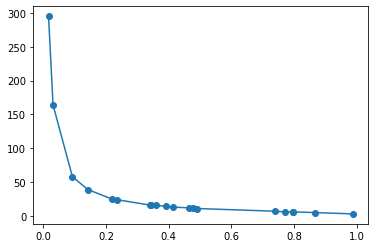

In [10]:
tol = 10**(-10)

rs = []
for i in range(20):
    rs.append(random.random())
    
number_of_iters = []
rs.sort()

for r in rs:
    A = np.zeros((2, 2))
    A[0][0] = 1
    A[1][1] = 1
    A[0][1] = r
    A[1][0] = r
    evs, num_iter = QRMethod(A, tol)
    number_of_iters.append(num_iter)
    
plt.figure()
plt.plot(rs, number_of_iters)
plt.scatter(rs, number_of_iters)
plt.xlabel = 'r'
plt.ylabel = 'number of iterations'
plt.show()

As is calculated, the eigenvalues of A are 1+r and 1-r, since r in (0,1), 1+r > 1-r, the ratio then is (1+r)/(1-r).

In [11]:
for r in rs:
    print('when r =',r,', the ratio is', (1+r)/(1-r))

when r = 0.016678929125200304 , the ratio is 1.0339236687165914
when r = 0.031042856768998317 , the ratio is 1.064074777684151
when r = 0.09270856733868471 , the ratio is 1.2043633699190723
when r = 0.14195894965519196 , the ratio is 1.3308908113385602
when r = 0.2186084877939426 , the ratio is 1.559536376781872
when r = 0.23498999725316383 , the ratio is 1.6143449011370083
when r = 0.3406244383605045 , the ratio is 2.0331727718678665
when r = 0.34230395334293484 , the ratio is 2.040918384967634
when r = 0.3604606017403792 , the ratio is 2.1272506517074663
when r = 0.3898907931174136 , the ratio is 2.278101653668199
when r = 0.41415030713271084 , the ratio is 2.4138449236211414
when r = 0.46300997646217235 , the ratio is 2.724463979467418
when r = 0.4763470135074064 , the ratio is 2.819323199884562
when r = 0.48955901361508725 , the ratio is 2.9181806581884517
when r = 0.7372462069288025 , the ratio is 6.611688404658222
when r = 0.7719007737396567 , the ratio is 7.768113915990581
when 

Since the convergence speed depends on the absolute value of the ratio of consecutive eigenvalues, as we can see, when r is larger (closer to 1 in (0,1)), the ratio becomes larger, hence our number of iterations decreases.

## Question5: Google and Eigenvectors

### (a)

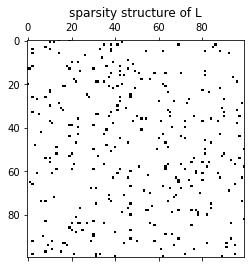

In [12]:
# Construct a large stochastic matrix
def StochasticMatrix(n):
    I = np.identity(n)
    A = 0.5*I[np.random.permutation(n),:] + (np.maximum(2, np.random.normal(size=(n, n)))-2)
    A = A - np.diag(A.diagonal())
    L = A@np.diag(1./ np.maximum(1e-10, np.sum(A, 1)))
    return L

L = StochasticMatrix(100)

plt.spy(L)
plt.title('sparsity structure of L')
plt.show()

### (b)

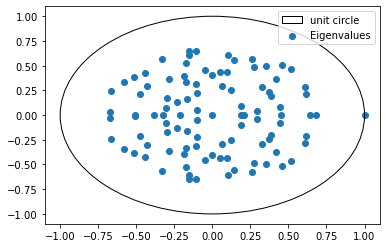

In [13]:
evl, evt = np.linalg.eig(L)

plt.figure()
plt.scatter(evl.real, evl.imag, label = 'Eigenvalues')
unit_circle = plt.Circle((0, 0),1, fill=False,label = 'unit circle')
ax = plt.gca()
ax.add_patch(unit_circle)
plt.legend()
plt.show()

As we can see in the figure above, all the eigenvalues except one of them are inside the unit circle, only one is on the circle standing for eigenvalue 1.

### (c)

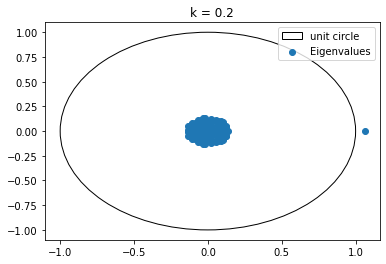

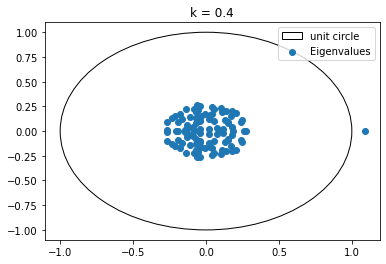

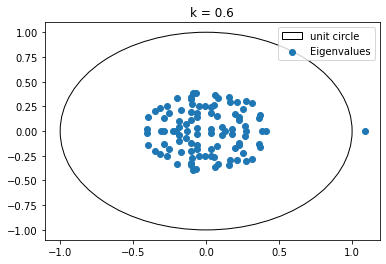

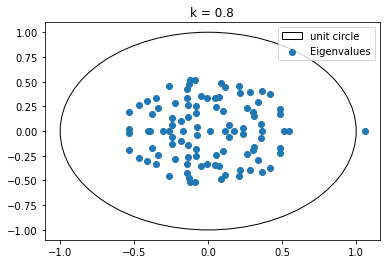

In [15]:
ks = [0.2, 0.4, 0.6, 0.8]

n = 100
E = np.array([1/n]* n**2).reshape(n, n)

for k in ks:
    S = k*L + (1-k)*E
    S_evl, S_ect = np.linalg.eig(S)
    
    plt.figure()
    plt.title('k = {:.1f}'.format(k))
    plt.scatter(S_evl.real, S_evl.imag, label = 'Eigenvalues')
    unit_circle = plt.Circle((0, 0),1, fill=False,label = 'unit circle')
    ax = plt.gca()
    ax.add_patch(unit_circle)
    plt.legend()
    plt.show()

As we can see, when introducing k, our eigenvalues (except the largest eigenvalue 1), are more concentrated to the origin; when k is smaller, the eigenvalues are more concentrated.
Since the speed of the convergence is determined by the ratio between the largest and second largert eigenvalues, and when introducing k we get smaller second largest eigenvalue, we conclude that the ratio becomes larger.
Hence, by introducing k, we improve the speed of convergence.